In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install plotly
#!pip install scikit-learn
#!pip install scikit-learn==0.24.2
#!pip install hnswlib
#!pip install annoy
#!pip install seaborn

In [2]:
#!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

/home/sean/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
#import plotly.express as px
#import plotly.graph_objs as go
from matplotlib import dates as mpl_dates
from matplotlib import pyplot as plt

In [5]:
#model and performance
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report

In [146]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
df = pd.read_csv("3D_Printing_data.csv")

In [7]:
df

,ID,ts,Temp,RelativeHumidity
0,3DPrinter_S5_Env,2024-02-21T11:57:15.000Z,21.6875,31.490845
1,3DPrinter_S5_Env,2024-02-21T11:57:20.000Z,21.6875,31.490845
2,3DPrinter_S5_Env,2024-02-21T11:57:25.000Z,21.7500,31.475586
3,3DPrinter_S5_Env,2024-02-21T11:57:30.000Z,21.6875,31.475586
4,3DPrinter_S5_Env,2024-02-21T11:57:35.000Z,21.6875,31.475586
...,...,...,...,...
1075376,3DPrinter_S5_Env,2024-04-13T20:59:21.000Z,25.8750,28.782410
1075377,3DPrinter_S5_Env,2024-04-13T20:59:26.000Z,25.8750,28.790039
1075378,3DPrinter_S5_Env,2024-04-13T20:59:31.000Z,25.8750,28.805298
1075379,3DPrinter_S5_Env,2024-04-13T20:59:36.000Z,25.9375,28.820557


In [8]:
df.describe()

,Temp,RelativeHumidity
count,1.007983e+06,1.075381e+06
mean,2.020231e+01,3.023567e+01
std,3.251303e+00,3.392731e+00
min,1.087500e+01,1.861243e+01
25%,1.856250e+01,2.808051e+01
50%,2.037500e+01,3.010992e+01
75%,2.218750e+01,3.225378e+01
max,3.293750e+01,4.845099e+01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075381 entries, 0 to 1075380
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1075381 non-null  object 
 1   ts                1075381 non-null  object 
 2   Temp              1007983 non-null  float64
 3   RelativeHumidity  1075381 non-null  float64
dtypes: float64(2), object(2)
memory usage: 32.8+ MB


In [10]:
df.isna().sum()

ID                      0
ts                      0
Temp                67398
RelativeHumidity        0
dtype: int64

In [11]:
df.rename(columns={'ts': 'time'}, inplace=True)
df.rename(columns={'Temp': 'Temperature'}, inplace=True)

In [12]:
df = df.sort_values(by='time', ascending=True)

df = df.head(600000)

df = df.reset_index(drop=True)

In [13]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.tz_localize(None)
df = df.drop(columns=['ID'],axis=1)

In [14]:
df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.1250,48.450989
1,2024-02-16 17:44:35,21.2500,46.909851
2,2024-02-16 17:44:40,21.2500,45.925659
3,2024-02-16 17:44:45,21.2500,45.559448
4,2024-02-16 17:44:50,21.2500,45.177979
...,...,...,...
599995,2024-03-22 11:25:44,24.6250,23.617310
599996,2024-03-22 11:25:49,24.5625,23.609680
599997,2024-03-22 11:25:54,24.5625,23.609680
599998,2024-03-22 11:25:59,24.5625,23.632568


In [15]:
df['Temperature'] = round(df['Temperature'], 2)
df['RelativeHumidity'] = round(df['RelativeHumidity'], 2)

In [16]:
filled_df = df
new_df1 = filled_df

In [17]:
new_df = new_df1
new_df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.12,48.45
1,2024-02-16 17:44:35,21.25,46.91
2,2024-02-16 17:44:40,21.25,45.93
3,2024-02-16 17:44:45,21.25,45.56
4,2024-02-16 17:44:50,21.25,45.18
...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62
599996,2024-03-22 11:25:49,24.56,23.61
599997,2024-03-22 11:25:54,24.56,23.61
599998,2024-03-22 11:25:59,24.56,23.63


# MISSING DATA IMPUTATION

In [18]:
new_df['Temperature'].interpolate(method='linear', inplace=True)

print(new_df)

new_df.isna().sum()

                      time  Temperature  RelativeHumidity
0      2024-02-16 17:44:30        21.12             48.45
1      2024-02-16 17:44:35        21.25             46.91
2      2024-02-16 17:44:40        21.25             45.93
3      2024-02-16 17:44:45        21.25             45.56
4      2024-02-16 17:44:50        21.25             45.18
...                    ...          ...               ...
599995 2024-03-22 11:25:44        24.62             23.62
599996 2024-03-22 11:25:49        24.56             23.61
599997 2024-03-22 11:25:54        24.56             23.61
599998 2024-03-22 11:25:59        24.56             23.63
599999 2024-03-22 11:26:04        24.56             23.63

[600000 rows x 3 columns]


time                0
Temperature         0
RelativeHumidity    0
dtype: int64

# TIME SERIES PLOT OF THE RAW DATA

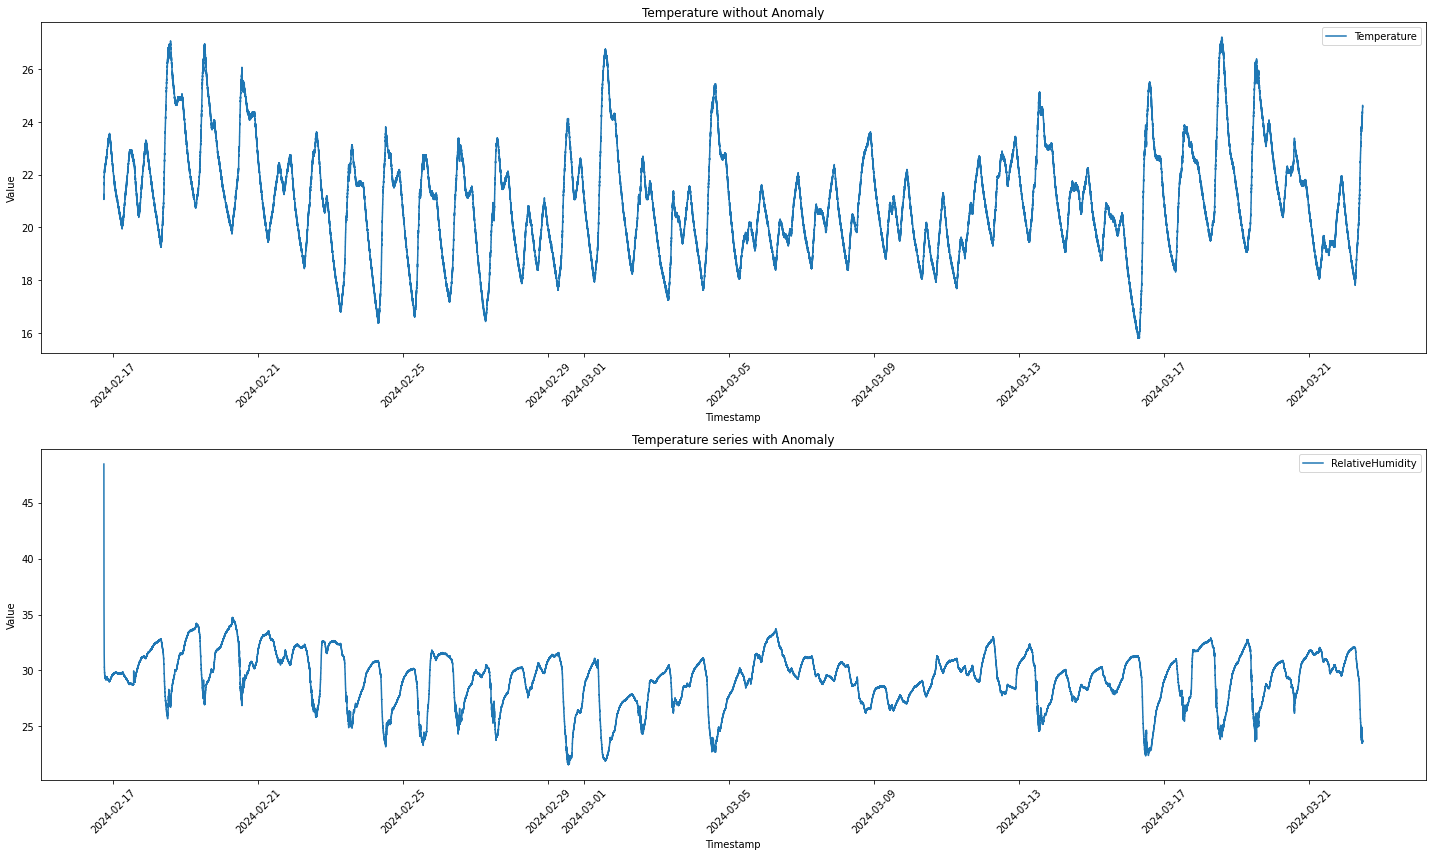

In [19]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(new_df['time'], new_df['Temperature'], label='Temperature')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Temperature without Anomaly')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RelativeHumidity'], label='RelativeHumidity')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Temperature series with Anomaly')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


# CORRELATION ANALYSIS

In [20]:
correlation = new_df['Temperature'].corr(new_df['RelativeHumidity'])

print("Correlation between Temperature and RelativeHumidity:", correlation)

Correlation between Temperature and RelativeHumidity: -0.5193350918167688


#  INJECT ARTIFICIAL OUTLIERS TO TEMPERATURE DATA

# The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)

In [21]:
new_df['Temp_anomaly'] = new_df['Temperature']

new_df['anomaly_time'] = pd.to_datetime(new_df['time'])


specific_dates1 = ['2024-03-13', '2024-03-03', '2024-02-19']
specific_dates2 = ['2024-02-21', '2024-02-25', '2024-03-07']
specific_dates3 = ['2024-02-23', '2024-02-26', '2024-03-09']
specific_dates4 = ['2024-02-29', '2024-03-05']


# Create the condition mask
mask1 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates1)) & (new_df['Temperature'].between(22.3, 22.45))
mask2 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates2)) & (new_df['Temperature'].between(20.4, 20.5))
mask3 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates3)) & (new_df['Temperature'].between(21.3, 21.4))
mask4 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates4)) & (new_df['Temperature'].between(21.5, 21.7))


# Apply the replacement
new_df.loc[mask1, 'Temp_anomaly'] = 33.885
new_df.loc[mask2, 'Temp_anomaly'] = 32.885
new_df.loc[mask3, 'Temp_anomaly'] = 24.885
new_df.loc[mask4, 'Temp_anomaly'] = 17.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50
...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59


# INJECT ARTIFICIAL OUTLIERS TO HUMIDITY DATA

# The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)

In [22]:
new_df['RH_anomaly'] = new_df['RelativeHumidity']

specific_dates5 = ['2024-02-27', '2024-02-22']
specific_dates6 = ['2024-03-04']
specific_dates7 = ['2024-02-22', '2024-02-24', '2024-03-13', '2024-03-17']
specific_dates8 = ['2024-03-16']

# Create the condition mask
mask5 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates5)) & (new_df['RelativeHumidity'].between(29.1, 29.5))
mask6 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates6)) & (new_df['RelativeHumidity'].between(26.7, 27.2))
mask7 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates7)) & (new_df['RelativeHumidity'].between(26.8, 27.0))
mask8 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates8)) & (new_df['RelativeHumidity'].between(30.2, 30.5))


# Apply the replacement
new_df.loc[mask5, 'RH_anomaly'] = 40.885
new_df.loc[mask6, 'RH_anomaly'] = 36.885
new_df.loc[mask7, 'RH_anomaly'] = 29.885
new_df.loc[mask8, 'RH_anomaly'] = 25.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18
...,...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44,23.62
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49,23.61
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54,23.61
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59,23.63


In [25]:
# Label the Synthetic Anomalies as -1 while Normal is 1

def replacevalues(val):
  if val in [33.885, 32.885, 24.885, 17.885]:
    return -1
  else:
    return 1

new_df['Temp_anomaly_labels'] = new_df['Temp_anomaly'].apply(replacevalues)


def replacevalues(val):
  if val in [40.885, 36.885, 29.885, 25.885]:
    return -1
  else:
    return 1

new_df['RH_anomaly_labels'] = new_df['RH_anomaly'].apply(replacevalues)

# TEMPERATURE AND HUMIDITY TIME SERIES WITH INJECTED ANOMALIES 

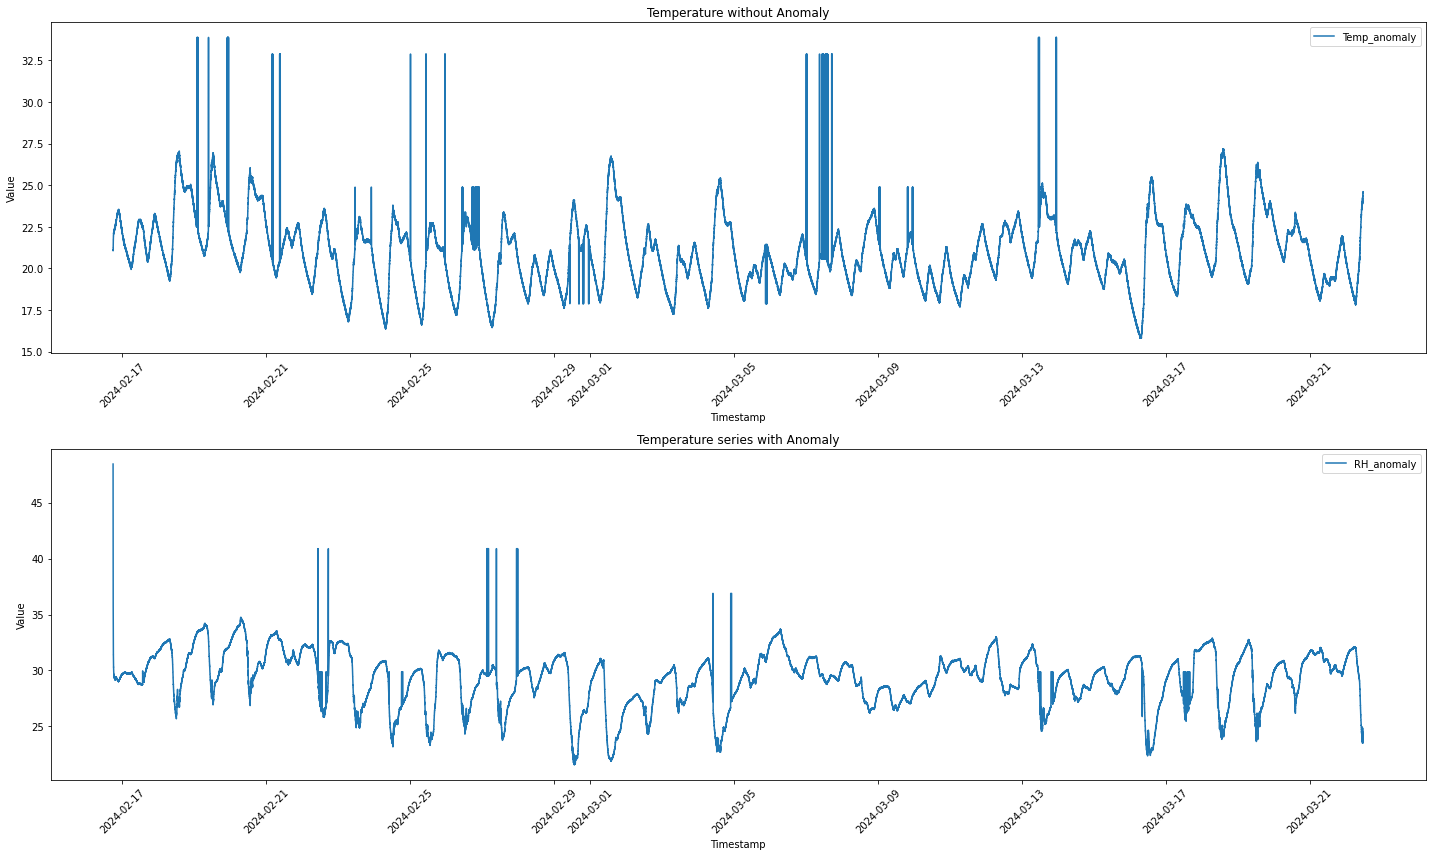

In [26]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(new_df['time'], new_df['Temp_anomaly'], label='Temp_anomaly')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Temperature without Anomaly')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RH_anomaly'], label='RH_anomaly')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Temperature series with Anomaly')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
clean_df = new_df

# TIME SERIES DECOMPOSITION USING STL PROCEDURE

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

#  Decompose to check temperature components
decomposition1 = seasonal_decompose(clean_df['Temp_anomaly'], model='additive', period=2300)
clean_df['Temp_Trend'] = decomposition1.trend
clean_df['Temp_Seasonality'] = decomposition1.seasonal
clean_df['Temp_Residual'] = decomposition1.resid

# Stationary temperature Series after removing trend and seasonality
clean_df['Temp_Stationary'] = clean_df['Temp_anomaly'] - (clean_df['Temp_Trend'] - clean_df['Temp_Seasonality'])
clean_df = clean_df.drop(columns=['Temp_Trend','Temp_Seasonality','Temp_Residual'], axis=1)

# Decompose to check humidity components
decomposition2 = seasonal_decompose(clean_df['RH_anomaly'], model='additive', period=2300)
clean_df['RH_Trend'] = decomposition2.trend
clean_df['RH_Seasonality'] = decomposition2.seasonal
clean_df['RH_Residual'] = decomposition2.resid

# Stationary humidity Series after removing trend and seasonality
clean_df['RH_Stationary'] = clean_df['RH_anomaly'] - clean_df['RH_Trend'] - clean_df['RH_Seasonality']
clean_df = clean_df.drop(columns=['RH_Trend','RH_Seasonality','RH_Residual'], axis=1)

In [29]:
new_df['RH_anomaly_labels'].value_counts()

RH_anomaly_labels
 1    595197
-1      4803
Name: count, dtype: int64

In [30]:
new_df['Temp_anomaly_labels'].value_counts()

Temp_anomaly_labels
 1    593498
-1      6502
Name: count, dtype: int64

In [31]:
clean_df = clean_df.dropna(subset=['Temp_Stationary'])
clean_df = clean_df.dropna(subset=['RH_Stationary'])

# RESIDUAL PLOT OF THE TEMPERATURE AND HUMIDITY TIME SERIES

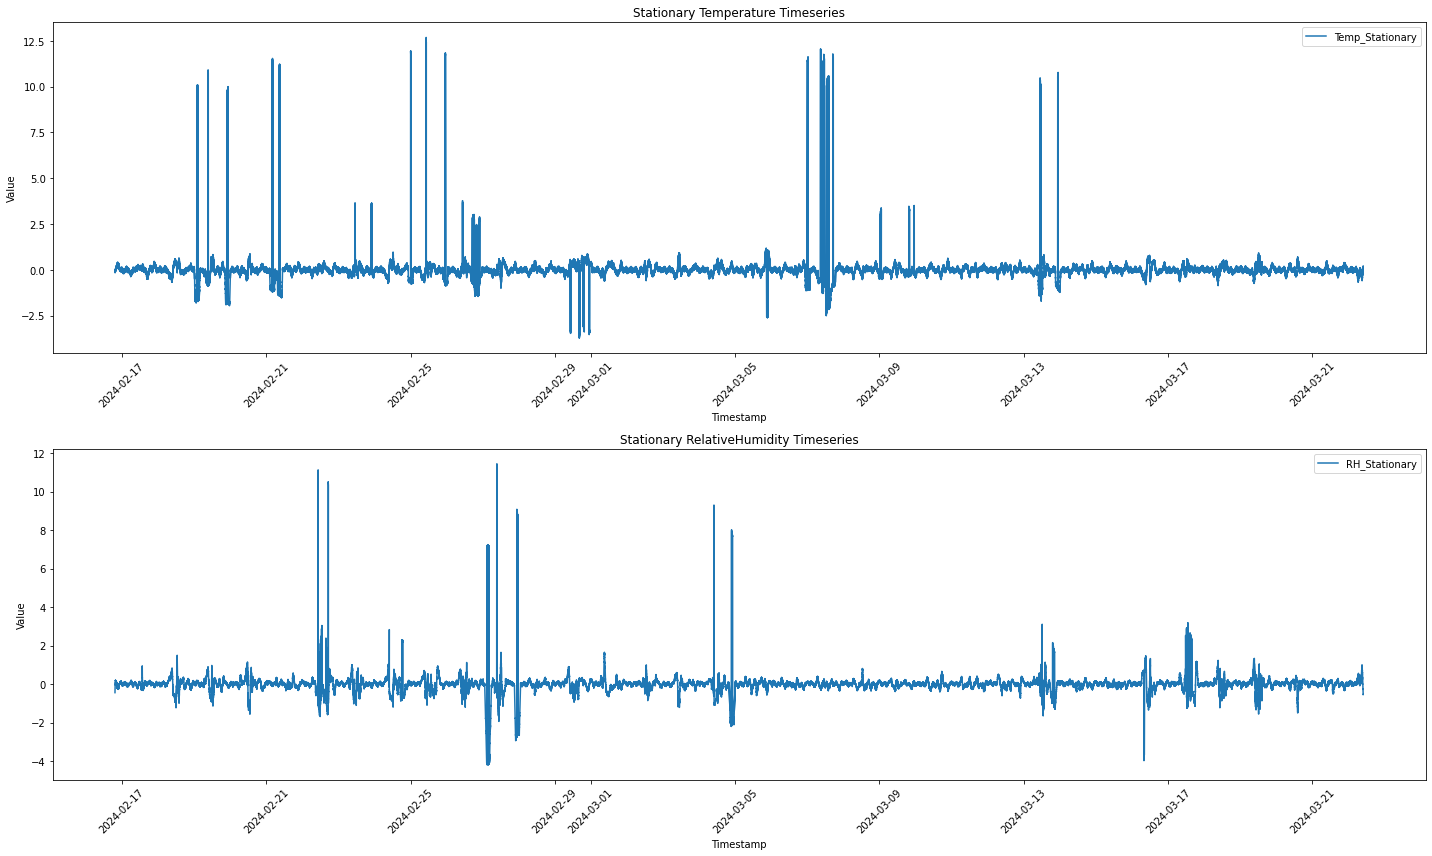

In [32]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(clean_df['time'], clean_df['Temp_Stationary'], label='Temp_Stationary')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Stationary Temperature Timeseries')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp and RelativeHumidity on the first subplot
axs[1].plot(clean_df['time'], clean_df['RH_Stationary'], label='RH_Stationary')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Stationary RelativeHumidity Timeseries')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

# TEST FOR STATIONARITY BY DIVIDING THE TIMESERIES AND FINDING THE MEAN

In [33]:
X = abs(clean_df['Temp_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.274440, mean2=0.236448
variance1=0.680129, variance2=0.619927


In [34]:
X = abs(clean_df['RH_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.304983, mean2=0.159661
variance1=0.682180, variance2=0.061617


In [36]:
#import pandas as pd
#from statsmodels.tsa.stattools import adfuller

#clean_df = clean_df.dropna(subset=['Temp_Stationary'])
#clean_df = clean_df.dropna(subset=['RH_Stationary'])

#adf_result1 = adfuller(clean_df['Temp_Stationary'])
#adf_result2 = adfuller(clean_df['RH_Stationary'])


# Print the ADF test results
#print(f"ADF Statistic: {adf_result1[0]}")
#print(f"p-value: {adf_result1[1]}")

#print(f"p-value: {adf_result2[1]}")

In [37]:
clean_df['Temp_Stationary'] = abs(clean_df['Temp_Stationary'])
clean_df['RH_Stationary'] = abs(clean_df['RH_Stationary'])

clean_df['Temp_RH_stationary'] = abs(clean_df['Temp_Stationary'] - clean_df['RH_Stationary'])

clean_df['var_Temp_anomaly'] = clean_df['Temp_Stationary'].var(ddof=0)
clean_df['var_RH_anomaly'] = clean_df['RH_Stationary'].var(ddof=0)

In [38]:
clean_df['Temp_RH_Anomaly_Labels'] = clean_df.apply(lambda row: 1 if (row['Temp_anomaly_labels'] == 1 and row['RH_anomaly_labels'] == 1) else -1, axis=1)

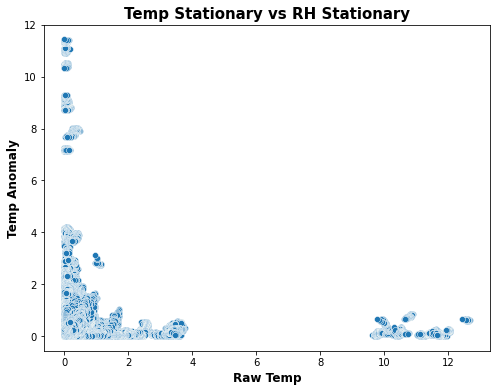

In [39]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x='Temp_Stationary', y='RH_Stationary')
plt.title('Temp Stationary vs RH Stationary', weight='bold', fontsize=15)
plt.ylabel('Temp Anomaly', weight='bold', fontsize=12)
plt.xlabel('Raw Temp', weight='bold', fontsize=12)
plt.show()

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# NOMALIZATION OF THE Z FEATURE

In [188]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


residual = clean_df[['time', 'Temp_RH_stationary', 'Temp_RH_Anomaly_Labels']]

val_min = residual['Temp_RH_stationary'].min()
val_max = residual['Temp_RH_stationary'].max()

# Feature scaling
residual['Temp_RH_scaled'] = residual['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))
residual = residual[['time','Temp_RH_scaled', 'Temp_RH_Anomaly_Labels']]

<ipython-input-188-d6cb45252a59>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residual['Temp_RH_scaled'] = residual['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))


In [189]:
residual = residual.reset_index(drop=True)
residual

,time,Temp_RH_scaled,Temp_RH_Anomaly_Labels
0,2024-02-16 19:28:41,0.009304,1
1,2024-02-16 19:28:46,0.009794,1
2,2024-02-16 19:28:51,0.004506,1
3,2024-02-16 19:28:56,0.004226,1
4,2024-02-16 19:29:01,0.004432,1
...,...,...,...
597495,2024-03-22 09:41:32,0.012795,1
597496,2024-03-22 09:41:37,0.016281,1
597497,2024-03-22 09:41:42,0.017671,1
597498,2024-03-22 09:41:47,0.017025,1


# MODEL BUILDING, EVALUATION AND TESTING WITH ARIMA MODEL

# TRAIN TEST SPLIT 

In [190]:
residual.set_index('time', inplace=True)

In [191]:


train_size = int(len(residual['Temp_RH_scaled']) * 0.7)
val_size = len(residual['Temp_RH_scaled']) - train_size  # The remaining 30% will be validation

# Split the dataframe into train and validation sets
train = residual.iloc[:train_size]
val = residual.iloc[train_size:]


In [223]:
# Fit ARIMA model on the training set
model = ARIMA(train['Temp_RH_scaled'], order=(5, 0, 3))  # Adjust (p, d, q) based on ACF, PACF
model_fit = model.fit()

/home/sean/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sean/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sean/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sean/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

In [224]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Temp_RH_scaled   No. Observations:               418250
Model:                 ARIMA(5, 0, 3)   Log Likelihood              861773.518
Date:                Tue, 24 Sep 2024   AIC                       -1723527.036
Time:                        21:18:52   BIC                       -1723417.598
Sample:                             0   HQIC                      -1723495.824
                             - 418250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0287      0.008      3.507      0.000       0.013       0.045
ar.L1         -0.0265      0.006     -4.318      0.000      -0.039      -0.014
ar.L2          0.5259      0.004    121.302      0.0

# TEST PREDICTIONS WITH ARIMA MODEL USING CONFIDENCE INTERVALS

In [225]:
import time

# Start the timer
start_time = time.time()

# Forecast on the test set
forecast = model_fit.get_forecast(steps=len(val))
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# End the timer
end_time = time.time()

# Calculate the time taken
execution_time = end_time - start_time
print(f"Time taken to run the validation data: {execution_time} seconds")

/home/sean/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sean/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Time taken to run the validation data: 2.875826597213745 seconds


In [226]:
val['lower Temp_RH_scaled'] = confidence_intervals.iloc[:, 0].values
val['upper Temp_RH_scaled'] = confidence_intervals.iloc[:, 1].values

<ipython-input-226-cb4155188fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['lower Temp_RH_scaled'] = confidence_intervals.iloc[:, 0].values
<ipython-input-226-cb4155188fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['upper Temp_RH_scaled'] = confidence_intervals.iloc[:, 1].values


# LABELLING PREDICTED VALUES AS '0' and '1'

In [227]:
# Assign -1 if the condition is met, else 0
val['anomalies'] = np.where(
    (val['Temp_RH_scaled'] < val['lower Temp_RH_scaled']) | 
    (val['Temp_RH_scaled'] > val['upper Temp_RH_scaled']), 
    1, 
    0
)

<ipython-input-227-65f0f97778de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['anomalies'] = np.where(


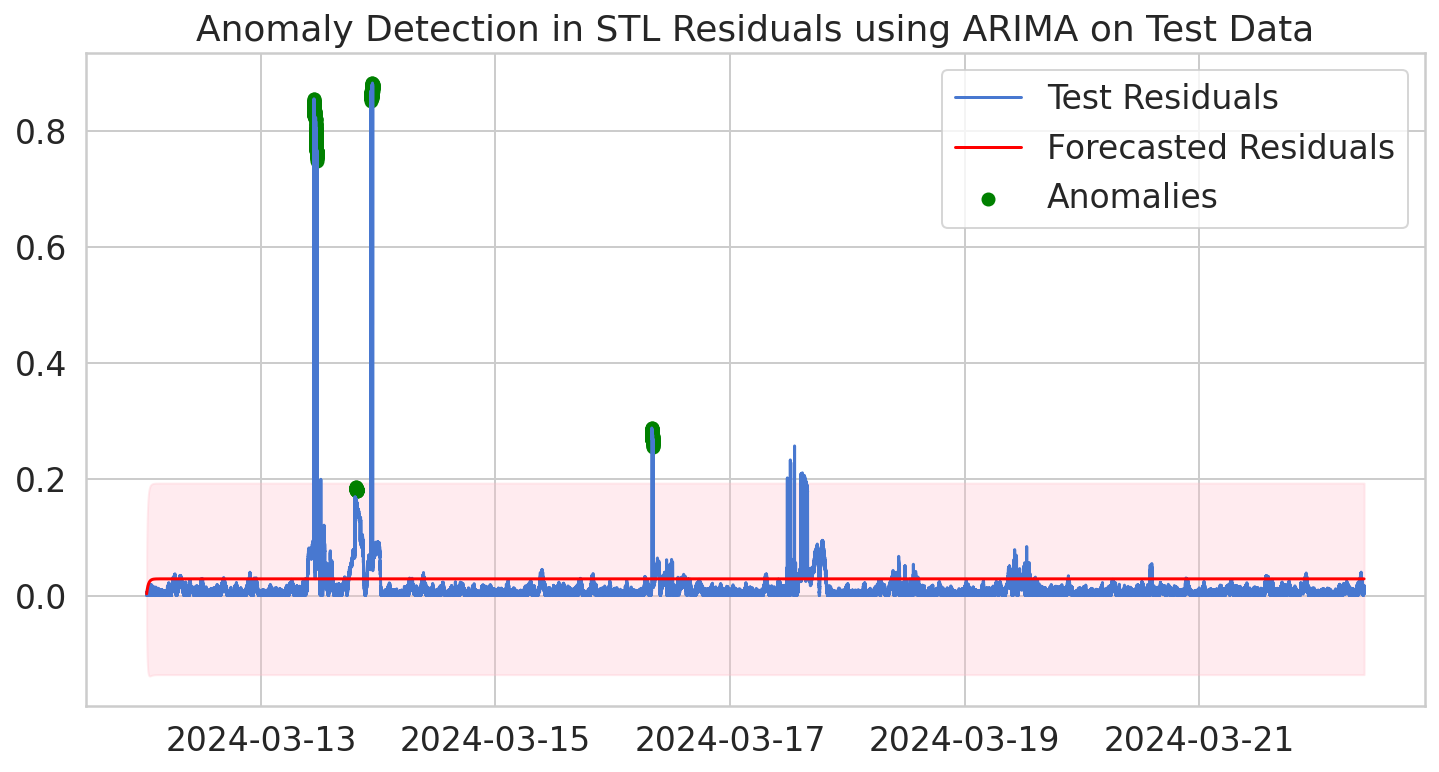

In [228]:
# Plot the residuals and forecast
plt.figure(figsize=(12, 6))
plt.plot(val.index, val['Temp_RH_scaled'], label='Test Residuals')
plt.plot(val.index, forecast_values, color='red', label='Forecasted Residuals')
plt.fill_between(val.index, val['lower Temp_RH_scaled'], val['upper Temp_RH_scaled'], color='pink', alpha=0.3)
plt.scatter(anomalies.index, anomalies['Temp_RH_scaled'], color='green', marker='o', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection in STL Residuals using ARIMA on Test Data')
plt.show()

In [229]:
test_values = val[['Temp_RH_Anomaly_Labels','anomalies']]
test_values.reset_index(drop=True) 

,Temp_RH_Anomaly_Labels,anomalies
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
179245,1,0
179246,1,0
179247,1,0
179248,1,0


In [230]:
test_values['anomalies'].value_counts()

anomalies
0    178410
1       840
Name: count, dtype: int64

 # LABELLING REFERENCE LABELS AS '0' AND '1'

In [231]:
test_values['Temp_RH_Anomaly_Labels'] = test_values['Temp_RH_Anomaly_Labels'].apply(lambda x: 1 if x == -1 else 0)

<ipython-input-231-7e4aa1fdd004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_values['Temp_RH_Anomaly_Labels'] = test_values['Temp_RH_Anomaly_Labels'].apply(lambda x: 1 if x == -1 else 0)


In [232]:
test_values['Temp_RH_Anomaly_Labels'].value_counts()

Temp_RH_Anomaly_Labels
0    177327
1      1923
Name: count, dtype: int64

# EVALUATION METRICS OF ARIMA MODEL IN DETECTING ANOMALIES

In [233]:
precision = precision_score(test_values['Temp_RH_Anomaly_Labels'], test_values['anomalies'],  pos_label=1)
recall = recall_score(test_values['Temp_RH_Anomaly_Labels'], test_values['anomalies'], pos_label=1)
f1 = f1_score(test_values['Temp_RH_Anomaly_Labels'], test_values['anomalies'], pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 0.43681747269890797
F1-Score: 0.6080347448425624


# CONFUSION MATRIX

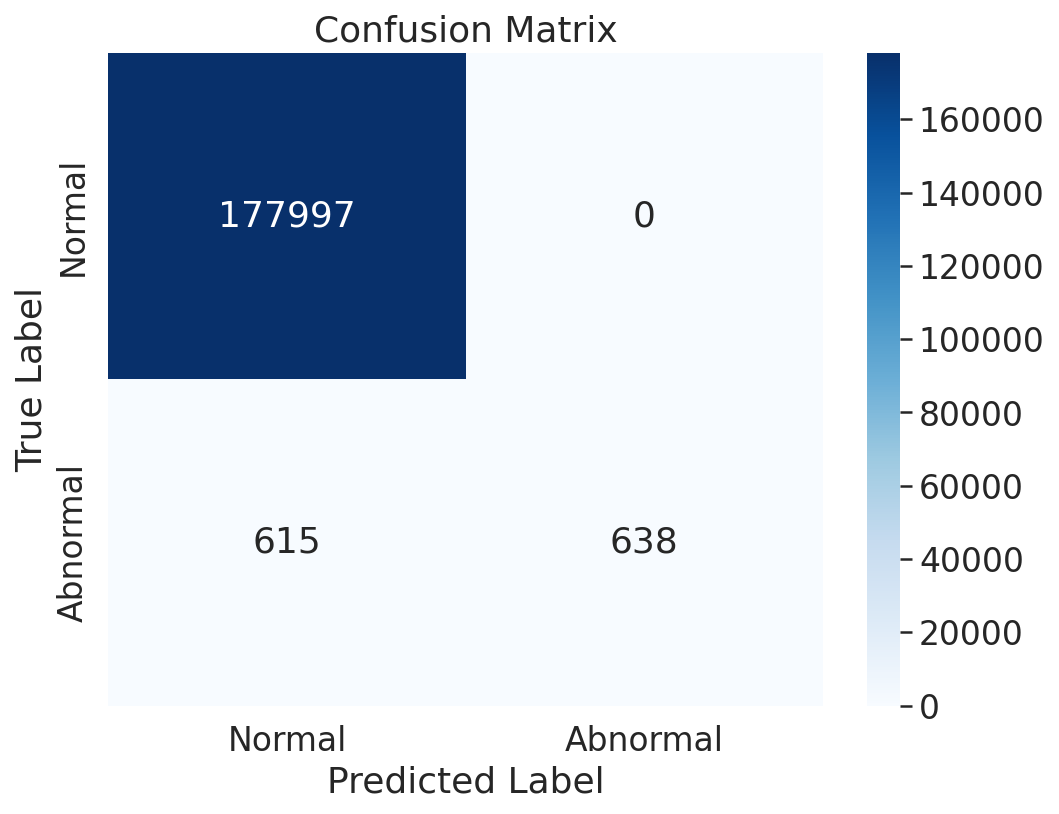

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test_values['Temp_RH_Anomaly_Labels'], test_values['anomalies'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
